In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from tqdm import tqdm
from matplotlib.pyplot import figure, text
import math

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
raw = pd.read_excel('./data/다시최종_전국.xlsx')
raw = raw[raw['거래금액'] > 0]
raw['업체명사업분야'].value_counts()

1.IT제조     4233
3.SW       1057
2.IT서비스     302
Name: 업체명사업분야, dtype: int64

In [3]:
raw = raw[raw['업체명사업분야'] == '3.SW']
selected = [k for k,v in zip(Counter(raw['업체명'].tolist() + raw['거래처명'].tolist()).keys(), Counter(raw['업체명'].tolist() + raw['거래처명'].tolist()).values()) if v > 1]

In [4]:
raw

,Unnamed: 0,업체명,업체명사업체규모,업체명업종(10차),업체명사업분야,사업자등록번호,거래처명,거래처등록번호,거래금액,거래구분,업종코드10차,기업규모,기업유형,시도,시군구
15,15,재상피앤에스,중소기업,58222,3.SW,6268601218,에스앤티에이엠티(주),6088109124,116650,판매처,C30399,중견기업,법인기업,경남,창원시 성산구
16,16,재상피앤에스,중소기업,58222,3.SW,6268601218,(주)무룡,6098109127,92189,판매처,C25922,중기업,법인기업,경남,창원시 마산회원구
17,17,재상피앤에스,중소기업,58222,3.SW,6268601218,(주)현진코리아,6098613873,58480,판매처,C29141,소기업,법인기업,경남,창원시 의창구
18,18,재상피앤에스,중소기업,58222,3.SW,6268601218,신진수출포장,6221362373,58541,판매처,C17211,소기업,개인기업,경남,김해시
19,19,재상피앤에스,중소기업,58222,3.SW,6268601218,(주)케이엘티시스템즈,6098158666,94780,판매처,J58221,소기업,법인기업,경남,창원시 성산구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,5596,브레인즈랩,중소기업,58221,3.SW,2728801145,(주)유브이코어,3148643222,38000,판매처,J58222,소상공인,법인기업,경남,진주시
5592,5599,로지텍코리아,중소기업,58222,3.SW,1338700752,지피티컴퍼니,6080848541,339841,판매처,G46733,소상공인,개인기업,경남,창원시 성산구
5593,5600,로지텍코리아,중소기업,58222,3.SW,1338700752,(주)태흥시스템,6098606708,104879,판매처,G46599,소상공인,법인기업,경남,창원시 성산구
5594,5601,로지텍코리아,중소기업,58222,3.SW,1338700752,(주)씨앤지,5608600369,7800,판매처,C29131,소상공인,법인기업,경남,창원시 의창구


In [5]:
temp = raw[raw['거래구분'] == '판매처']
cnt = [(a,b) for a, b in zip(temp['업체명'], temp['거래처명']) if (a in selected) & (b in selected)]
w = temp['거래금액'].tolist()

temp = raw[raw['거래구분'] == '구매처']
cnt = cnt + [(a,b) for a, b in zip(temp['업체명'], temp['거래처명']) if (a in selected) & (b in selected)]
w = w + temp['거래금액'].tolist()

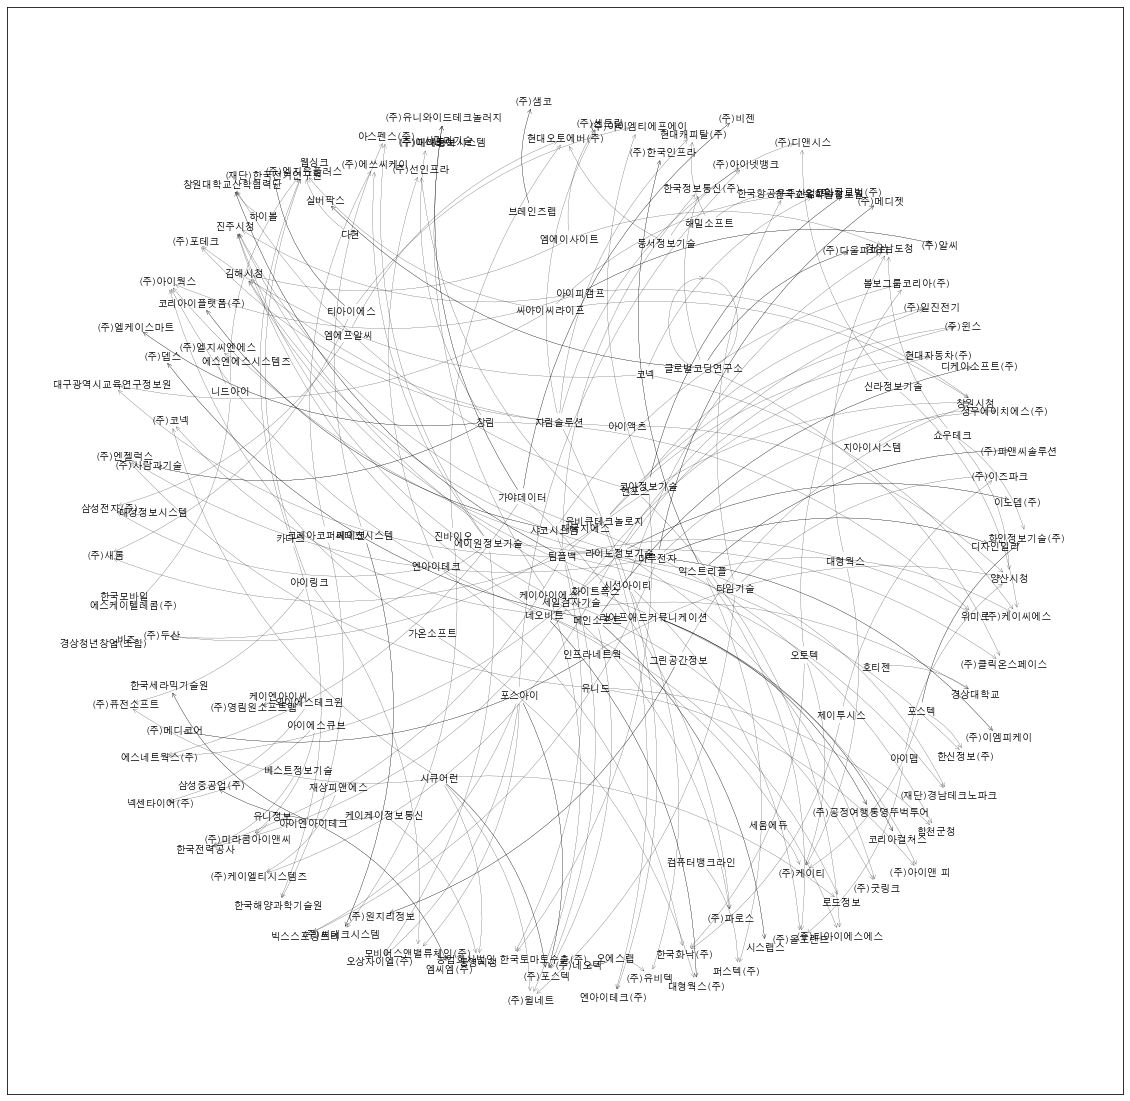

In [6]:
plt.figure(figsize = (20,20))

G = nx.DiGraph()

G.add_edges_from(cnt,relation='cnt')

pos=nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
relation = nx.get_edge_attributes(G, 'relation')

#nx.draw(G,pos, with_labels=True, edge_color='white')
nx.draw_networkx_edges(G,pos, edgelist=cnt, connectionstyle='arc3, rad = -0.2', arrowstyle='->', width = 0.2)
nx.draw_networkx_labels(G,pos,font_family=font,font_size=10)
plt.show()

In [7]:
temp = raw[raw['거래구분'] == '판매처']
cnt = [(a,b) for a, b in zip(temp['업체명'], temp['거래처명']) if (a in selected) & (b in selected)]
w = temp['거래금액'].tolist()

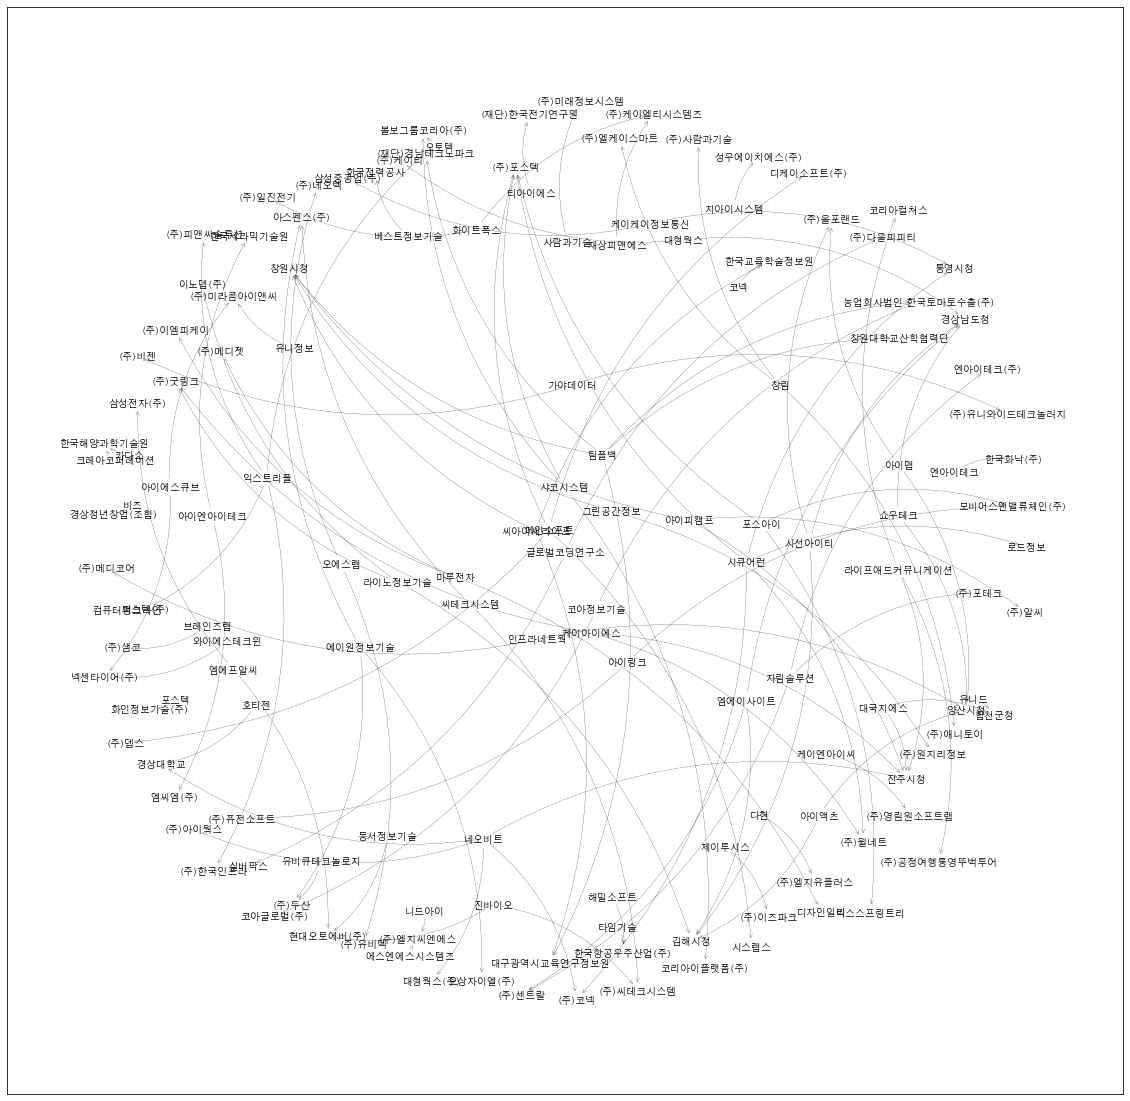

In [8]:
plt.figure(figsize = (20,20))

G = nx.DiGraph()

G.add_edges_from(cnt,relation='cnt')

pos=nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
relation = nx.get_edge_attributes(G, 'relation')

#nx.draw(G,pos, with_labels=True, edge_color='white')
nx.draw_networkx_edges(G,pos, edgelist=cnt, connectionstyle='arc3, rad = -0.2', arrowstyle='->', width = 0.2)
nx.draw_networkx_labels(G,pos,font_family=font,font_size=10)
plt.show()

In [9]:
temp = raw[raw['거래구분'] == '구매처']
cnt = [(b,a) for a, b in zip(temp['업체명'], temp['거래처명']) if (a in selected) & (b in selected)]
w = temp['거래금액'].tolist()

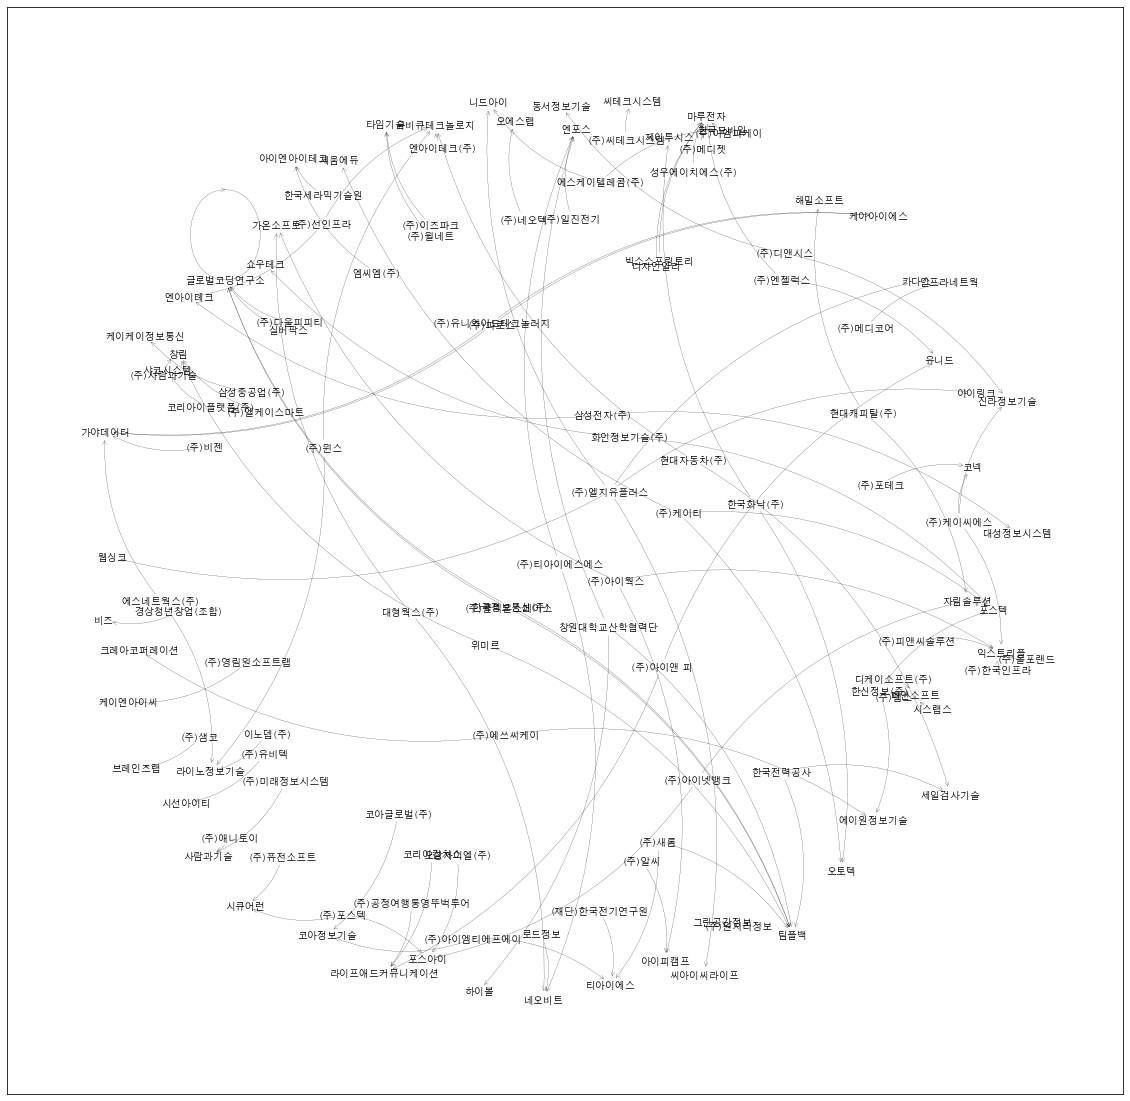

In [10]:
plt.figure(figsize = (20,20))

G = nx.DiGraph()

G.add_edges_from(cnt,relation='cnt')

pos=nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
relation = nx.get_edge_attributes(G, 'relation')

#nx.draw(G,pos, with_labels=True, edge_color='white')
nx.draw_networkx_edges(G,pos, edgelist=cnt, connectionstyle='arc3, rad = -0.2', arrowstyle='->', width = 0.2)
nx.draw_networkx_labels(G,pos,font_family=font,font_size=10)
plt.show()

In [3]:
temp = raw[raw['거래구분'] == '구매처']
top5 = temp.groupby(['업체명']).sum()['거래금액'].sort_values(ascending = False).index[:5]

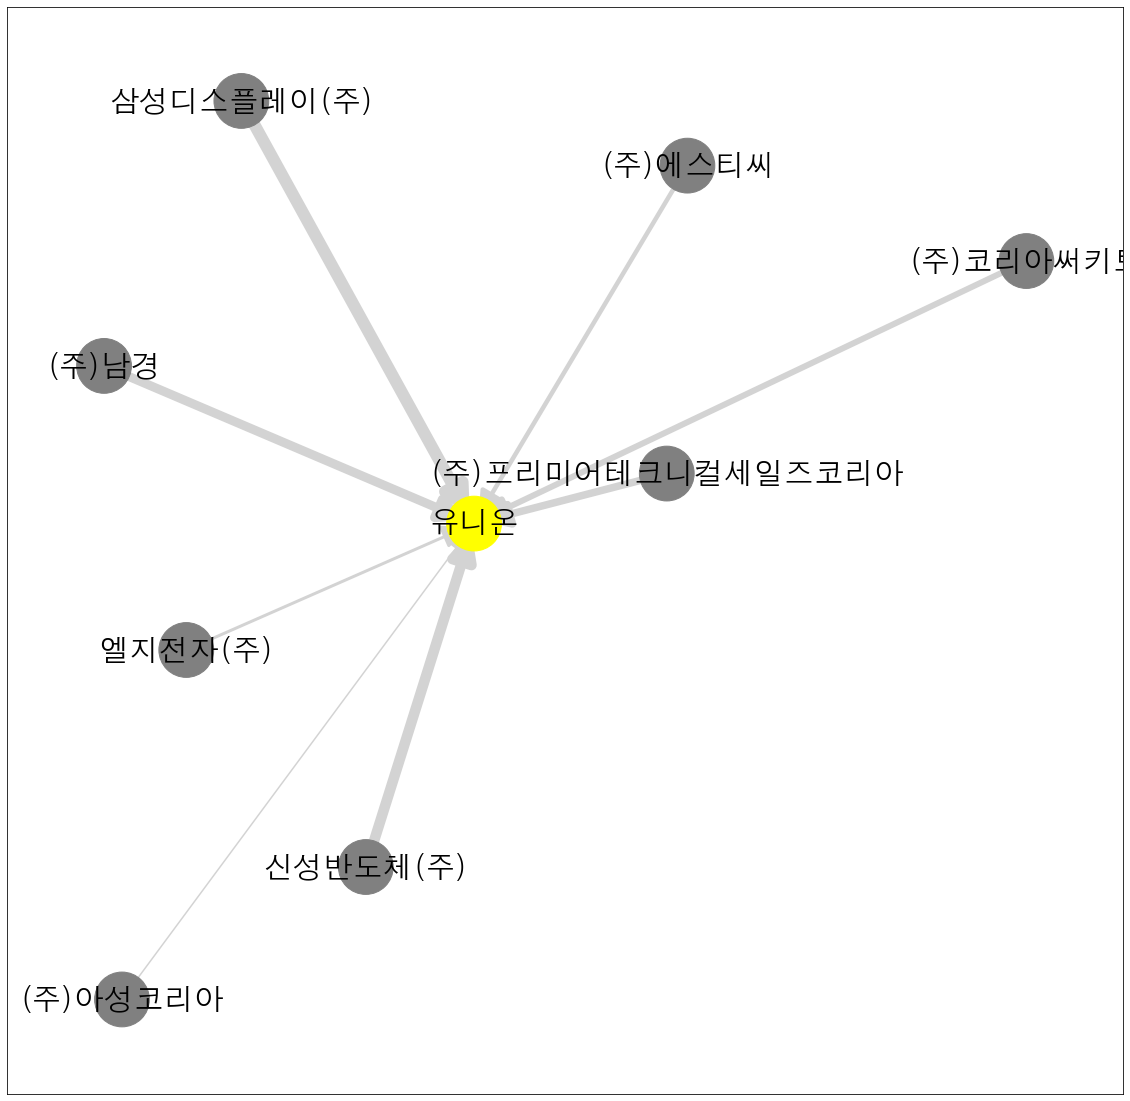

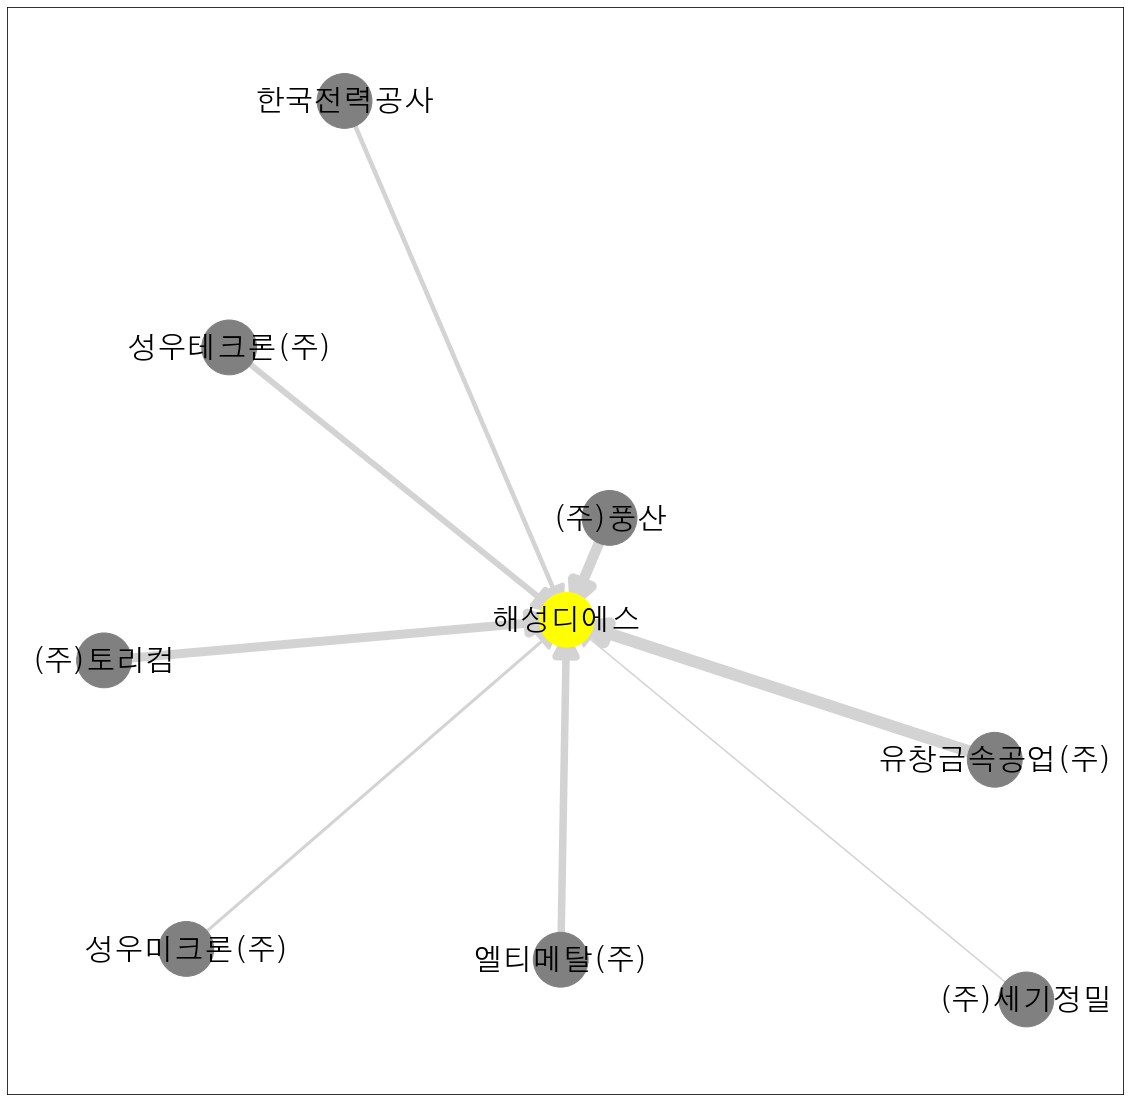

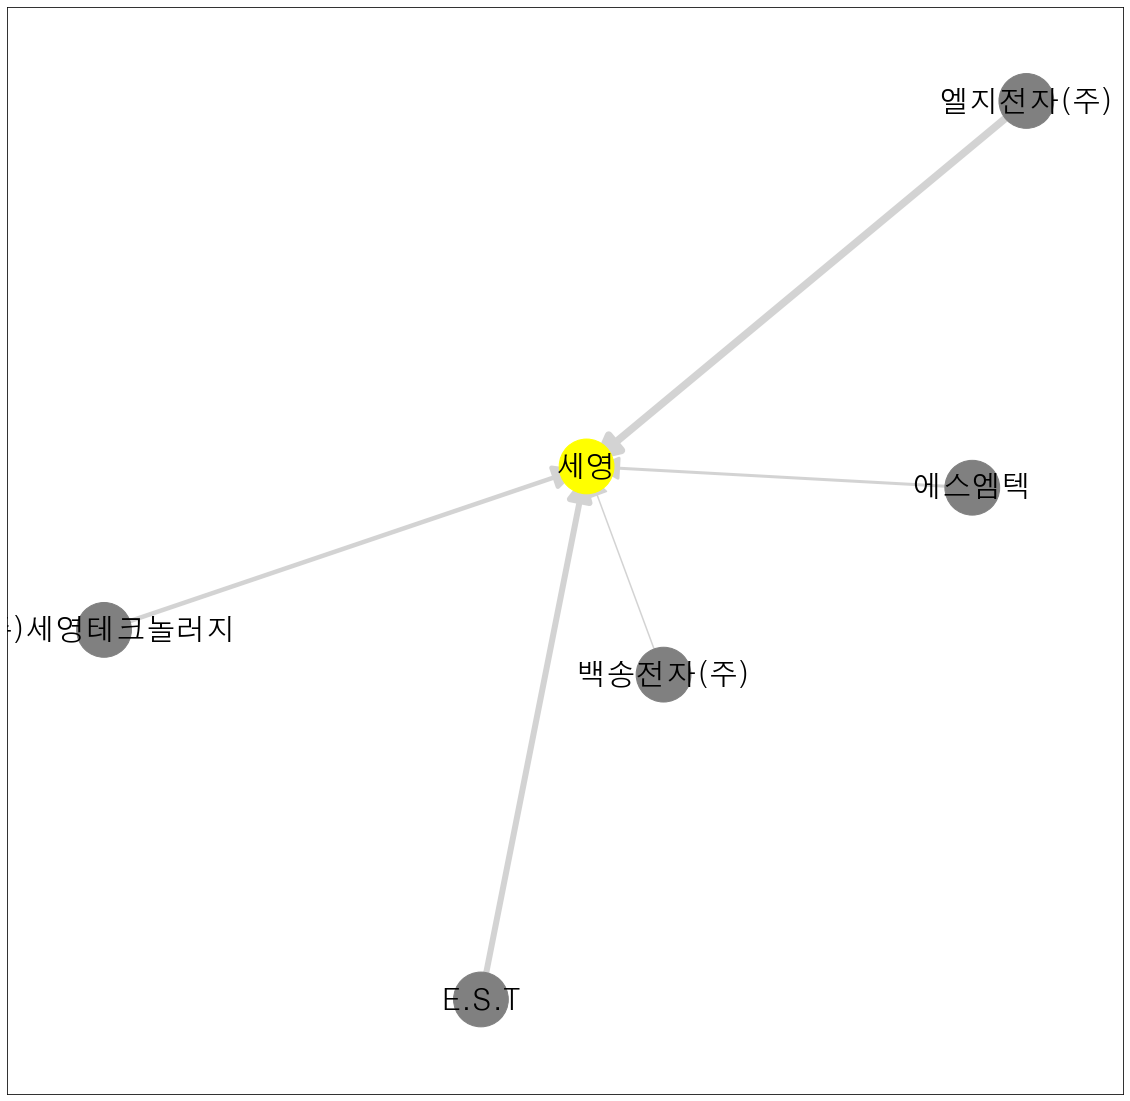

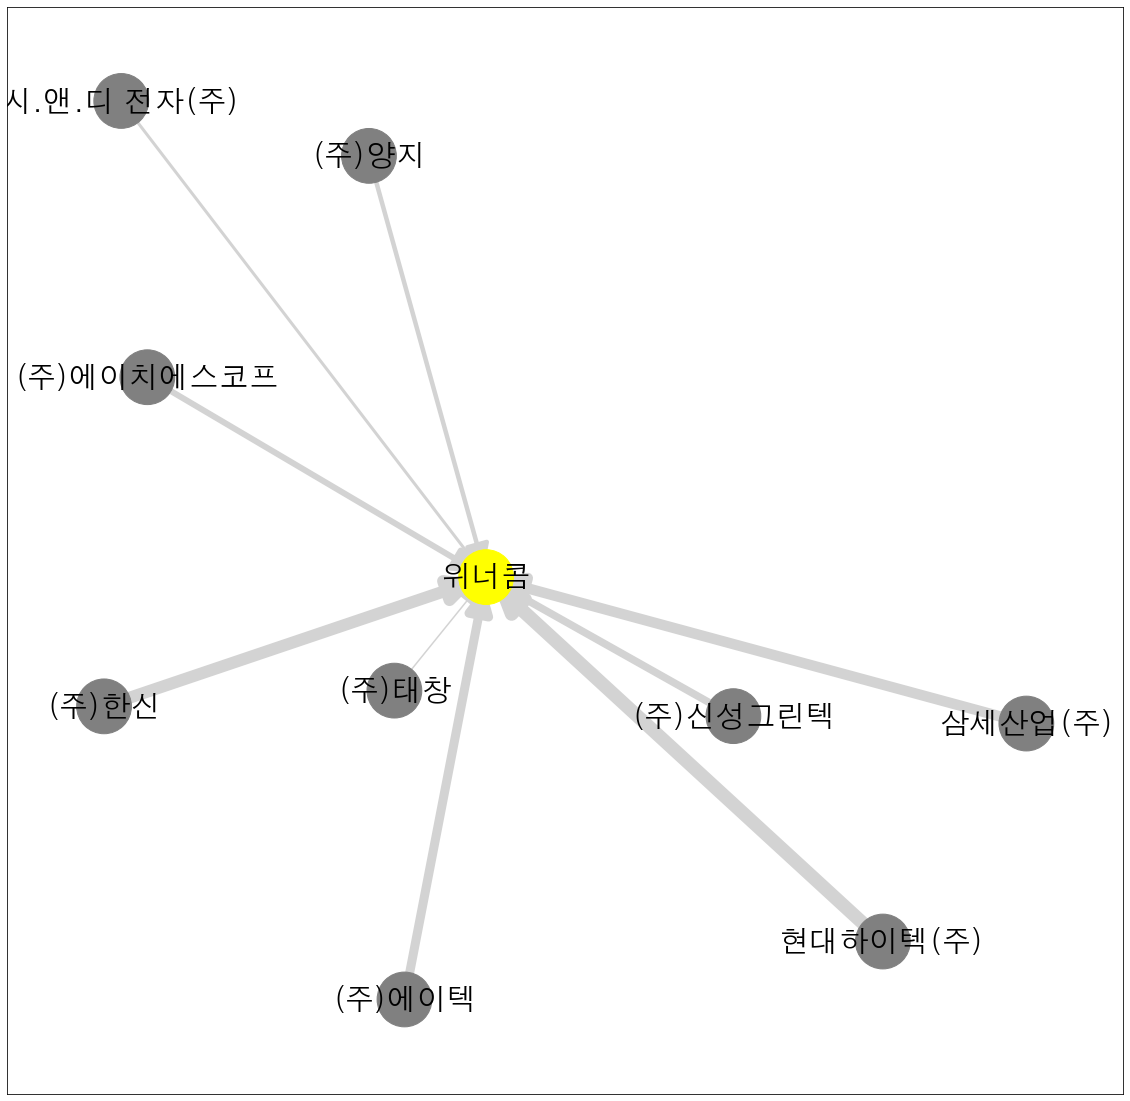

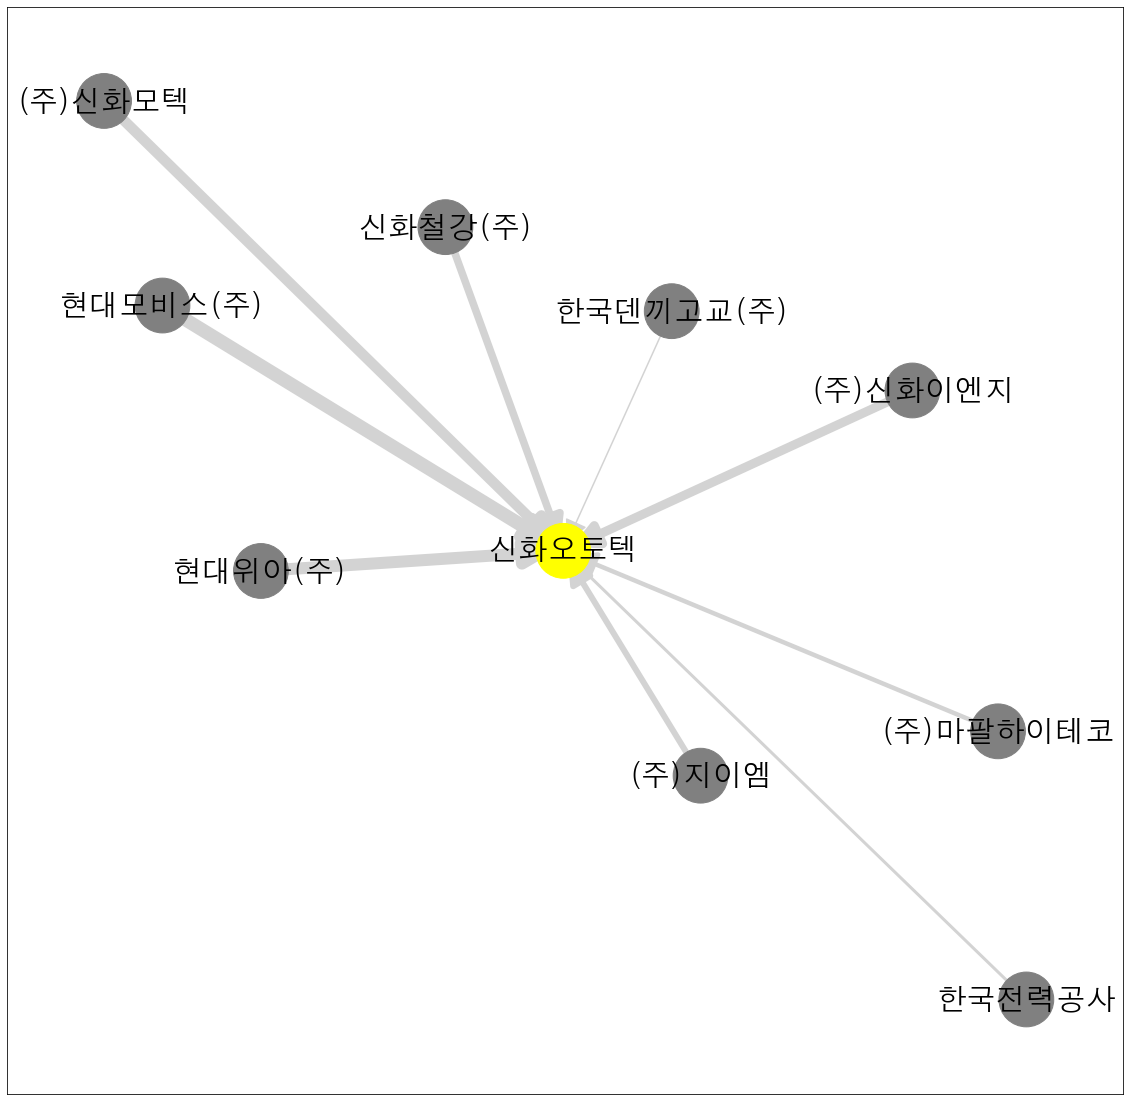

In [5]:
for f in top5:
    temp2 = temp[temp['업체명'] == f]
    cnt = [(b,a) for a, b in zip(temp2['업체명'], temp2['거래처명'])]
    w = temp2['거래금액'].tolist()
    w = [(sorted(w).index(i)+1)*1.5 for i in w]

    plt.figure(figsize = (20,20))

    G = nx.DiGraph()

    G.add_edges_from(cnt,relation='cnt')

    pos=nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
    pos[f] = np.array([0,0])
    relation = nx.get_edge_attributes(G, 'relation')

    #nx.draw(G,pos, with_labels=True, edge_color='white')
    nx.draw_networkx_nodes(G,pos, node_size=3000, node_color=['yellow' if i == f else 'gray' for i in pos.keys()])
    nx.draw_networkx_edges(G,pos, edgelist=cnt, arrowstyle='-|>', arrowsize = 50, width = w, edge_color='lightgray')
    nx.draw_networkx_labels(G,pos,font_family=font,font_size=30)
    plt.show()

In [7]:
temp = raw[raw['거래구분'] == '판매처']
top5 = temp.groupby(['업체명']).sum()['거래금액'].sort_values(ascending = False).index[:5]

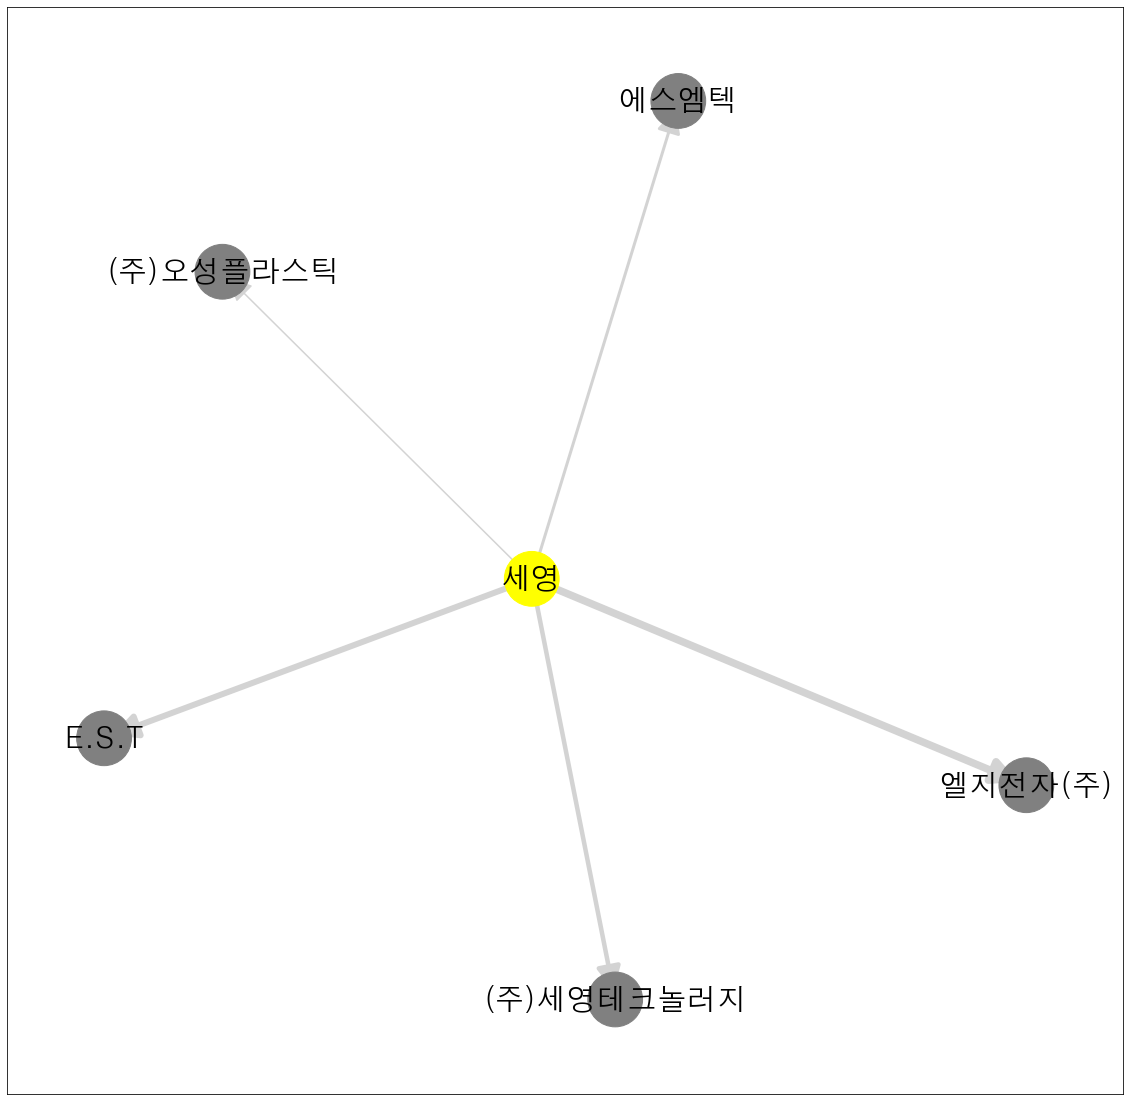

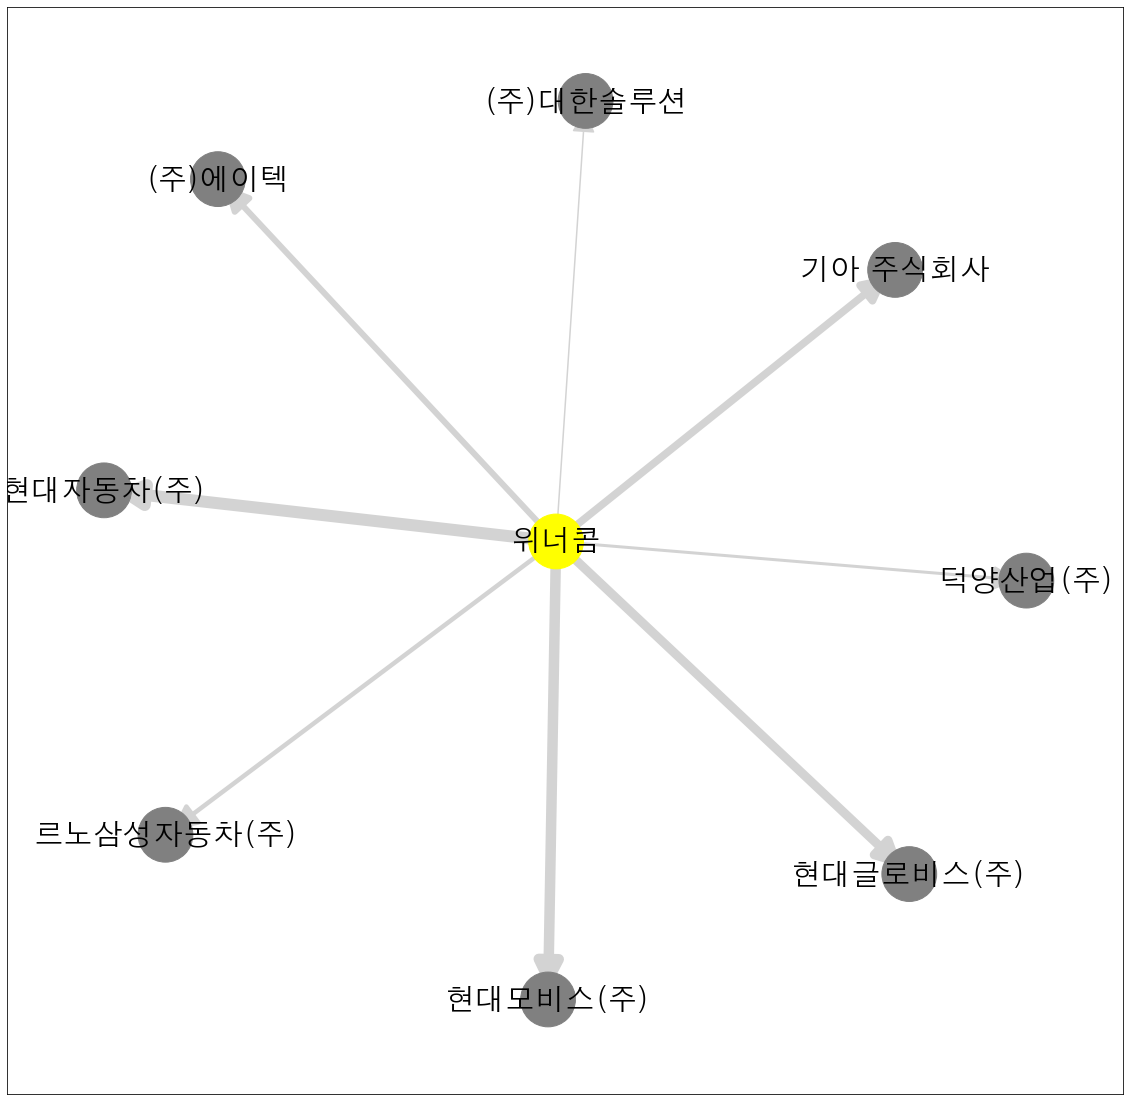

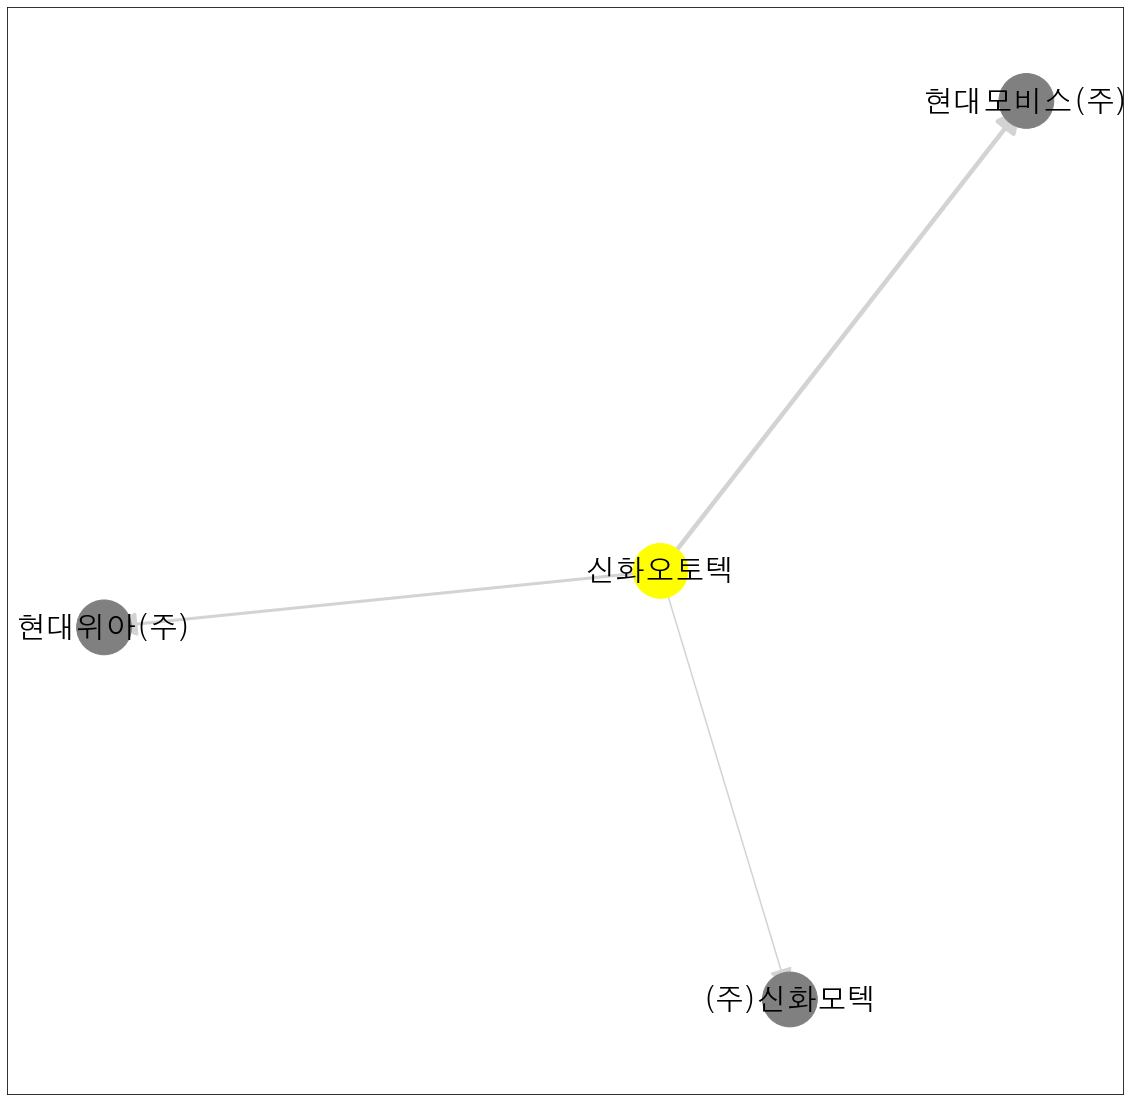

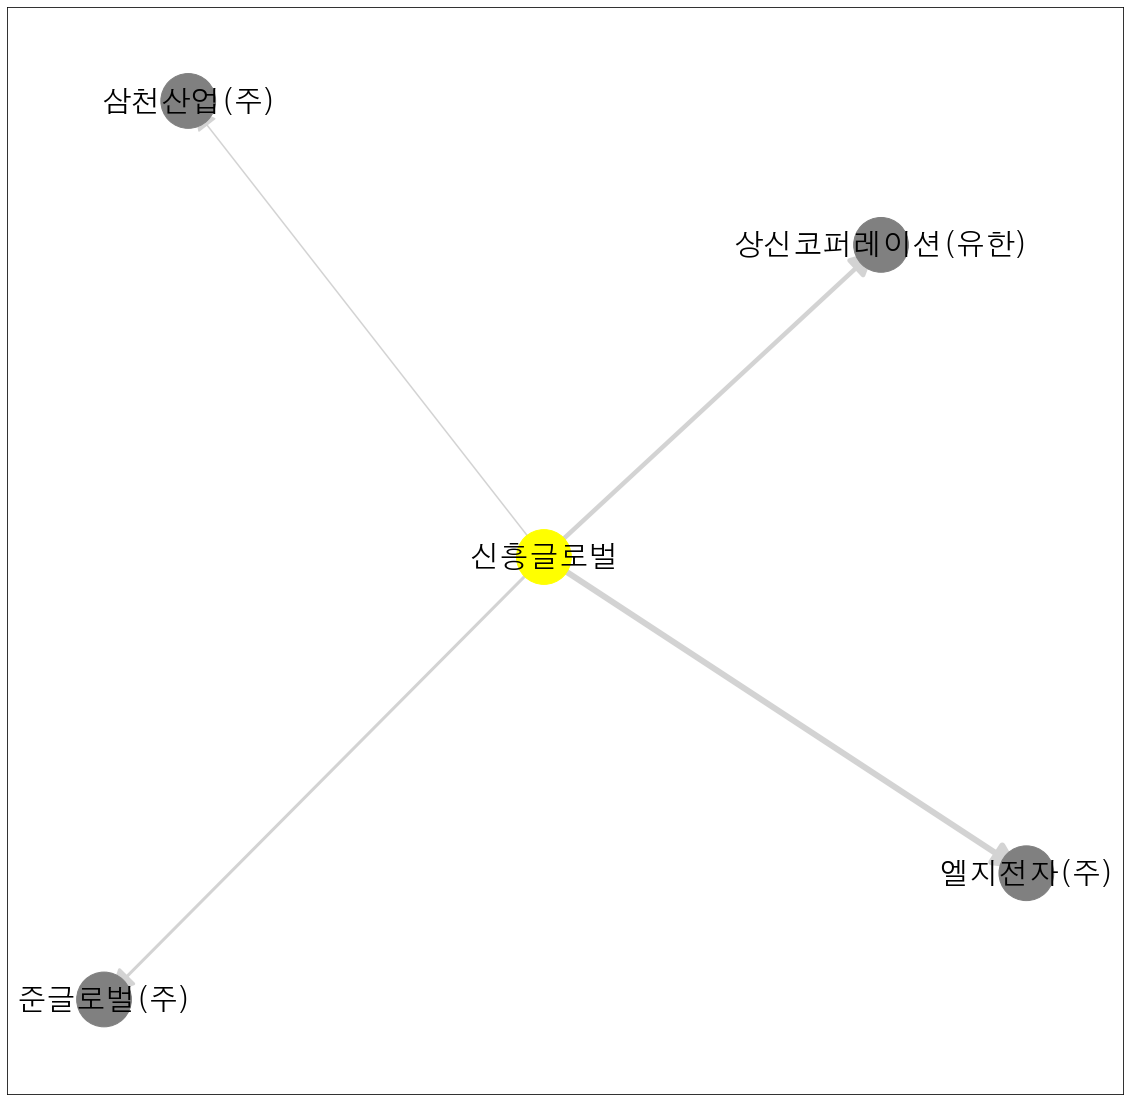

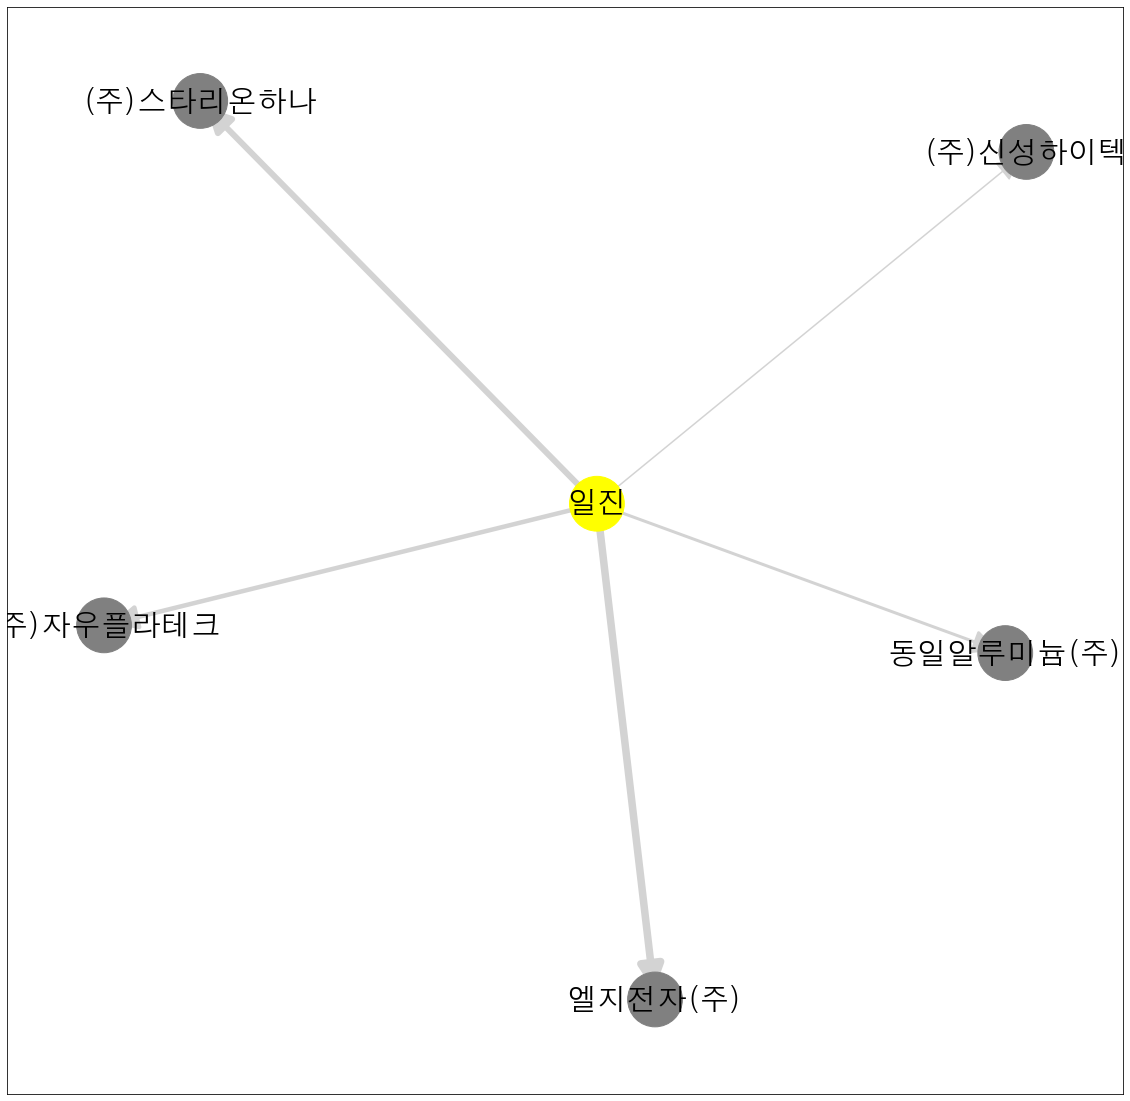

In [17]:
for f in top5:
    temp2 = temp[temp['업체명'] == f]
    cnt = [(a,b) for a, b in zip(temp2['업체명'], temp2['거래처명'])]
    w = temp2['거래금액'].tolist()
    w = [(sorted(w).index(i)+1)*1.5 for i in w]

    plt.figure(figsize = (20,20))

    G = nx.DiGraph()

    G.add_edges_from(cnt,relation='cnt')

    pos=nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
    pos[f] = np.array([0,0])
    relation = nx.get_edge_attributes(G, 'relation')

    #nx.draw(G,pos, with_labels=True, edge_color='white')
    nx.draw_networkx_nodes(G,pos, node_size=3000, node_color=['yellow' if i == f else 'gray' for i in pos.keys()])
    nx.draw_networkx_edges(G,pos, edgelist=cnt, arrowstyle='-|>', arrowsize = 50, width = w, edge_color='lightgray')
    nx.draw_networkx_labels(G,pos,font_family=font,font_size=30)
    plt.show()